In [175]:
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [176]:
raw = pd.read_csv('Salary_Data.csv')

In [177]:
data = raw.copy()
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
data['Education Level'] = data['Education Level'].replace({'phD': 'PhD', "Bachelor's Degree": "Bachelor's", "Master's Degree":"Master's"})
data.groupby('Education Level')['Salary'].mean().sort_values(ascending = False)

Education Level
PhD            165651.457999
Master's       130112.056452
Bachelor's      95082.908640
High School     36706.694196
Name: Salary, dtype: float64

In [179]:
data.dropna(axis=0, inplace = True)

In [180]:
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [181]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [182]:
education_map_dict = {
                    "Bachelor's" : 2, 
                     "Master's" : 3, 
                     'PhD' : 4, 
                     'High School' : 1
}
data['Education Level'] = data['Education Level'].map(education_map_dict)

In [183]:
data['Gender'] = data['Gender'].map({'Male' : 1, 'Female': 0})

In [184]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,2,Software Engineer,5.0,90000.0
1,28.0,0.0,3,Data Analyst,3.0,65000.0
2,45.0,1.0,4,Senior Manager,15.0,150000.0
3,36.0,0.0,2,Sales Associate,7.0,60000.0
4,52.0,1.0,3,Director,20.0,200000.0


In [185]:
data.shape

(6698, 6)

In [186]:
encoder = ce.BinaryEncoder(cols=['Job Title'])
data_encoded = encoder.fit_transform(data)

data_encoded

,Age,Gender,Education Level,Job Title_0,Job Title_1,Job Title_2,Job Title_3,Job Title_4,Job Title_5,Job Title_6,Job Title_7,Years of Experience,Salary
0,32.0,1.0,2,0,0,0,0,0,0,0,1,5.0,90000.0
1,28.0,0.0,3,0,0,0,0,0,0,1,0,3.0,65000.0
2,45.0,1.0,4,0,0,0,0,0,0,1,1,15.0,150000.0
3,36.0,0.0,2,0,0,0,0,0,1,0,0,7.0,60000.0
4,52.0,1.0,3,0,0,0,0,0,1,0,1,20.0,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,0.0,4,0,0,1,0,1,1,1,1,20.0,200000.0
6700,32.0,1.0,1,0,0,0,0,0,1,0,0,3.0,50000.0
6701,30.0,0.0,2,0,0,0,1,1,0,0,1,4.0,55000.0
6702,46.0,1.0,3,0,0,0,1,0,0,0,1,14.0,140000.0


In [187]:
data_encoded.dropna(inplace = True)

In [188]:
os.makedirs("plots", exist_ok=True)

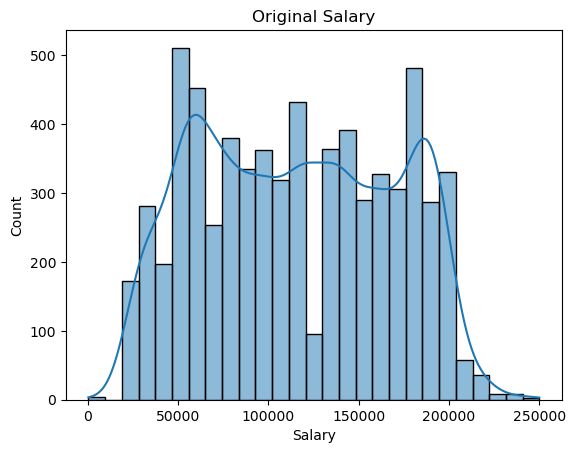

✅ Plot saved in plots/Salary_Distribution.png


In [189]:
sns.histplot(data_encoded['Salary'], kde=True)
plt.title("Original Salary")

plt.savefig("plots/Salary_Distribution.png", dpi=300, bbox_inches="tight")

plt.show()
plt.close()

print("✅ Plot saved in plots/Salary_Distribution.png")

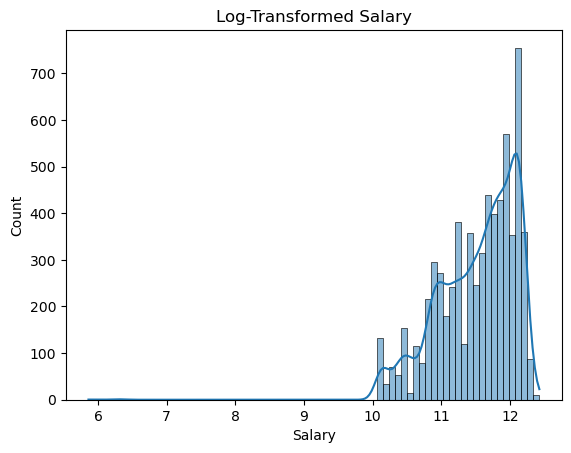

✅ Plot saved in plots/Salary_Distribution.png


In [190]:
sns.histplot(np.log1p(data_encoded['Salary']), kde=True)
plt.title("Log-Transformed Salary")

plt.savefig("plots/Log_Salary_Distribution.png", dpi=300, bbox_inches="tight")

plt.show()
plt.close()

print("✅ Plot saved in plots/Salary_Distribution.png")

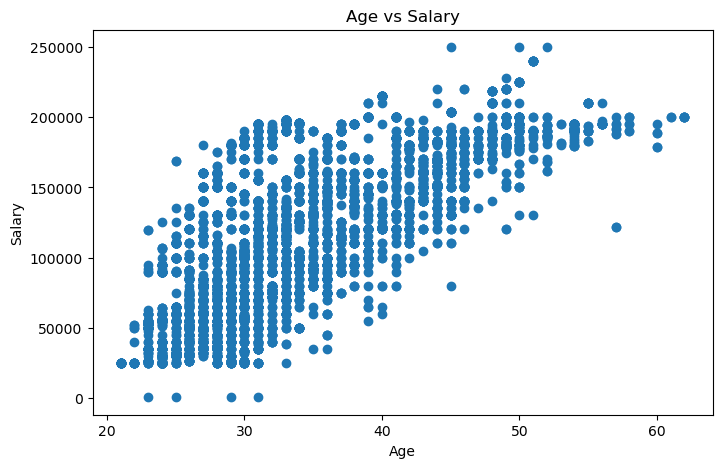

✅ Plot saved in plots/age_vs_salary.png


In [ ]:

plt.figure(figsize=(8,5))
plt.scatter(data=data_encoded, x='Age', y='Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')

# ✅ Save BEFORE showing
plt.savefig("plots/age_vs_salary.png", dpi=300, bbox_inches="tight")

plt.show()
plt.close()

print("✅ Plot saved in plots/age_vs_salary.png")

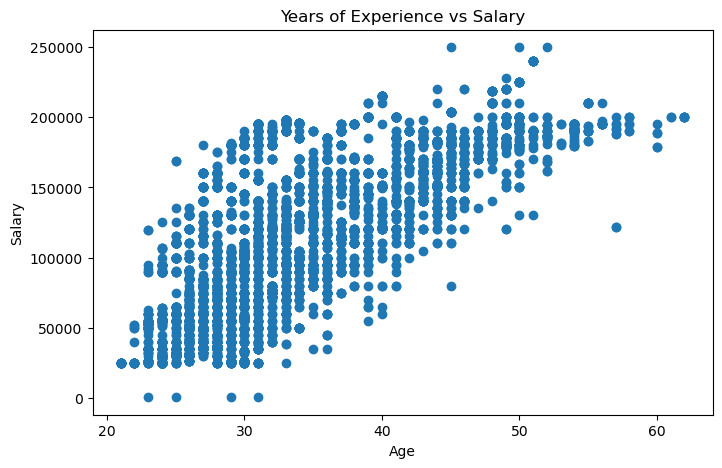

✅ Plot saved in plots/YOE vs salary.png


In [192]:
plt.figure(figsize=(8,5))
plt.scatter(data = data_encoded, x = 'Age', y='Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')

plt.savefig('plots/YOE vs salary.png', dpi=300, bbox_inches="tight")

plt.show()
plt.close()

print("✅ Plot saved in plots/YOE vs salary.png")

In [193]:
# Add original column back for reference
result = pd.concat([data['Job Title'], data_encoded.iloc[:, 3:11]], axis=1)
result.to_csv('job_title_map.csv', index = False)

In [194]:
data_encoded.to_csv('data_processed.csv', index = False)